# Pénzérme felismerés

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

A vizsgálni kívánt fotóbeolvasása és átméretezése:


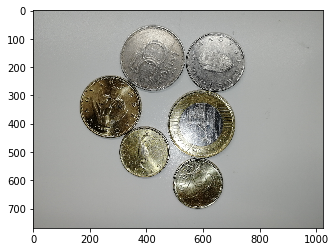

In [2]:
filename = "15.jpg"
img = cv2.imread(os.path.join("proba_kepek_fix_tavolsag", filename))

d = 1024 / img.shape[1]
dim = (1024, int(img.shape[0] * d))
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized[:,:,::-1])
plt.show()

A vizsgált RGB kép szürkeárnyalatos képpé került konvertálásra.

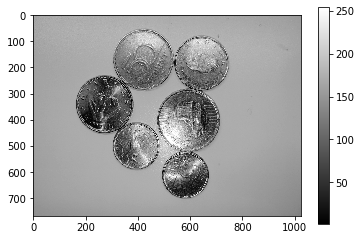

In [3]:
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = "gray")
plt.colorbar()
plt.show()

Gaussian szűrő alkalmazása a fotón.

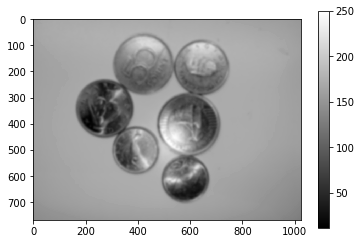

In [4]:
blur_img = cv2.GaussianBlur(img_gray,(21,21), 0)
plt.imshow(blur_img, cmap = "gray")
plt.colorbar()
plt.show()

In [5]:
circles = cv2.HoughCircles(blur_img,cv2.HOUGH_GRADIENT,1,120,param1=30,param2=25, minRadius=50, maxRadius=120)
print("A megtalál körök egy tömben kerültek eltárolásra:",'\n')
print(circles)

print('\n',"A feldolgozott képen", circles.shape[1], "kör került feltalálásra.")

A megtalál körök egy tömben kerültek eltárolásra: 

[[[422.5 171.5 115. ]
  [643.5 184.5 104.8]
  [592.5 402.5 110. ]
  [275.5 341.5 112.7]
  [392.5 501.5  90.2]
  [575.5 611.5  84.7]]]

 A feldolgozott képen 6 kör került feltalálásra.


A megtalál körök kirajzolása.

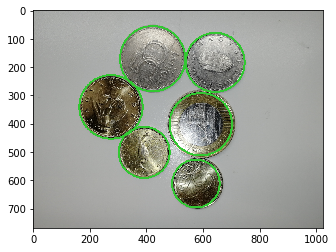

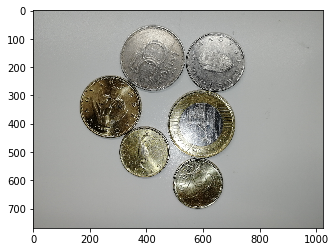

In [6]:
resized_withcircle = resized.copy()

for i in circles[0,:]:
    cv2.circle(resized_withcircle,(i[0],i[1]),i[2],(50,200,50),5)

plt.imshow(resized_withcircle[:,:,::-1])
plt.show()
plt.imshow(resized[:,:,::-1])
plt.show()

A megtalált érmék érékeinek meghatározása, és az értékek összegének kiszámolása a feltalált körök átmérőjének felhasználásával.

In [7]:
feltalalt_ermek_osszerteke = 0
feltalalt_ermek = [0,0,0,0,0,0]
ermek = [5,10,20,50,100,200]
for i in circles[0,:]:
    if (i[2] <= 100):
        feltalalt_ermek_osszerteke += 5
        feltalalt_ermek[0] += 1
    elif (i[2] > 100 and i[2] <=104):
        feltalalt_ermek_osszerteke += 100
        feltalalt_ermek[4] += 1
    elif (i[2] > 104 and i[2] <=109):
        feltalalt_ermek_osszerteke += 10
        feltalalt_ermek[1] += 1
    elif (i[2] > 109 and i[2] <=114):
        feltalalt_ermek_osszerteke += 20
        feltalalt_ermek[2] += 1
    elif (i[2] > 114 and i[2] <=119):
        feltalalt_ermek_osszerteke += 50
        feltalalt_ermek[3] += 1
    elif (i[2] > 119):
        feltalalt_ermek_osszerteke += 200
        feltalalt_ermek[5] += 1

Eredmény összesítés egy kép vonatkozásában.

In [8]:
feltalalt_ermek_szama = circles.shape[1]
print("A ", filename, " fájlban a feltalált érmék darab száma: ", feltalalt_ermek_szama, 
      "a feltalált érmék kiszámított összértéke pedig", feltalalt_ermek_osszerteke, ".")
print ("A feltalált érmék:")
z = 0
for i in feltalalt_ermek:
    print( i, " db.", ermek[z], "Ft-os")
    z = z + 1

A  15.jpg  fájlban a feltalált érmék darab száma:  6 a feltalált érmék kiszámított összértéke pedig 110 .
A feltalált érmék:
2  db. 5 Ft-os
1  db. 10 Ft-os
2  db. 20 Ft-os
1  db. 50 Ft-os
0  db. 100 Ft-os
0  db. 200 Ft-os


Az algoritmus hatásfokának ellenőrzése: 

In [11]:
talat_eredmeny_tomb = []
eredmeny_tomb = []
f = open(os.path.join("proba_kepek_fix_tavolsag", "eredmenyek.txt"))
x = f.readlines()
f.close()
for i in x:
    eredmeny_tomb.append(i.split())
    
for i in range(1,(len(eredmeny_tomb)-1)):
    filename = str(i) + ".jpg"
    img = cv2.imread(os.path.join("proba_kepek_fix_tavolsag", filename))
    d = 1024 / img.shape[1]
    dim = (1024, int(img.shape[0] * d))
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(img_gray,(21,21), 0)
    circles = cv2.HoughCircles(blur_img,cv2.HOUGH_GRADIENT,1,120,param1=30,param2=25, minRadius=50, maxRadius=120)
    feltalalt_ermek_osszerteke = 0
    feltalalt_ermek = [0,0,0,0,0,0]
    ermek = [5,10,20,50,100,200]
    for i in circles[0,:]:
        if (i[2] <= 100):
            feltalalt_ermek_osszerteke += 5
            feltalalt_ermek[0] += 1
        elif (i[2] > 100 and i[2] <=104):
            feltalalt_ermek_osszerteke += 100
            feltalalt_ermek[4] += 1
        elif (i[2] > 104 and i[2] <=109):
            feltalalt_ermek_osszerteke += 10
            feltalalt_ermek[1] += 1
        elif (i[2] > 109 and i[2] <=114):
            feltalalt_ermek_osszerteke += 20
            feltalalt_ermek[2] += 1
        elif (i[2] > 114 and i[2] <=119):
            feltalalt_ermek_osszerteke += 50
            feltalalt_ermek[3] += 1
        elif (i[2] > 119):
            feltalalt_ermek_osszerteke += 200
            feltalalt_ermek[5] += 1

    aktualis_eredmeny = [filename,circles.shape[1], feltalalt_ermek_osszerteke]
    talat_eredmeny_tomb.append(aktualis_eredmeny)

eltalalt_darab_szamok = 0
eltalat_ossz_ertek = 0
    
for i in range(1,(len(eredmeny_tomb)-2)):
    if (int(eredmeny_tomb[i][1]) == int(talat_eredmeny_tomb[i][1])):
        eltalalt_darab_szamok +=1
    if (int(eredmeny_tomb[i][2]) == int(talat_eredmeny_tomb[i][2])):
        eltalat_ossz_ertek +=1
 
print(" Az érmek darab számát", (len(eredmeny_tomb)-2) ,"kép feldolgozása során, az algoritmus ", int(eltalalt_darab_szamok/(len(eredmeny_tomb)-2) * 100), "% ban találta el, míg az érmék összértékét ", int(eltalat_ossz_ertek/(len(eredmeny_tomb)-2) * 100), "% ban." )

 Az érmek darab számát 19 kép feldolgozása során, az algoritmus  84 % ban találta el, míg az érmék összértékét  31 % ban.
